In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [50]:
df_knn = pd.read_csv("df_cbd_tfidf.csv")

In [51]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBD
0,8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
1,14,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.001046
2,15,0.0,0.0,0.0,0.0,0.0,0.100026,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0.001046
3,18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
4,18,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
59996,42970,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
59997,42972,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046
59998,42973,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.001046


Splitting dependent and independent variables

In [52]:
X = df_knn.drop(['X..CBD', 'index'], axis = 1)
y = df_knn[['X..CBD']]

In [53]:
X.columns.to_list()

['tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',
 'tfidf_7

Plotting histograms on target variable

In [54]:
y_array = y.to_numpy()
y_array

array([[0.00104646],
       [0.00104646],
       [0.00104646],
       ...,
       [0.00104646],
       [0.00104646],
       [0.00104646]])

<AxesSubplot:ylabel='Count'>

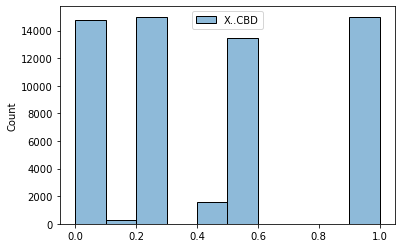

In [55]:
sns.histplot(y, bins = 10)

Train test split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [57]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [58]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [59]:
mean_absolute_error(y_val, y_pred_knreg)

0.04564545722167505

In [60]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8825515848943302

In [61]:
#val
r2_score(y_val, y_pred_knreg)

0.8055610742004261

Feature Selection

In [62]:
rfreg = RandomForestRegressor()

In [63]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [64]:
selector.estimator_.feature_importances_

array([1.72022742e-03, 9.25647537e-04, 7.93977279e-04, 6.29088014e-04,
       3.41240881e-04, 1.43496692e-03, 3.56077204e-03, 4.68771516e-03,
       4.47851344e-04, 7.06162909e-04, 3.16590028e-04, 3.37813288e-02,
       4.35546216e-04, 4.59962231e-04, 4.28208078e-04, 3.69111077e-04,
       1.40876129e-03, 3.97472230e-04, 2.79208272e-04, 1.23289421e-03,
       9.24744625e-04, 1.30086913e-03, 6.02682574e-04, 2.36530895e-04,
       1.86179745e-03, 1.32766701e-03, 1.42578946e-03, 6.74438265e-04,
       8.77334046e-04, 1.62813694e-04, 3.73089976e-03, 5.99676328e-04,
       1.07314556e-03, 5.48444662e-04, 1.17941650e-03, 1.46474937e-04,
       1.39674430e-04, 2.86891646e-03, 6.86861063e-03, 2.42256805e-03,
       7.09084387e-05, 2.25079009e-04, 5.14664172e-04, 5.39038621e-03,
       3.75725972e-04, 9.89854636e-04, 4.07632359e-03, 1.28819006e-04,
       9.39758105e-03, 8.25034567e-04, 3.03640032e-04, 3.60771768e-04,
       3.49484881e-04, 4.19886624e-04, 1.02413184e-03, 2.27525217e-03,
      

In [65]:
selector.threshold_

0.0021321961620469083

In [66]:
mask = selector.get_support()

In [67]:
mask

array([False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False,

In [68]:
selected_features = X.columns[mask]

In [69]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_6,tfidf_7,tfidf_11,tfidf_30,tfidf_37,tfidf_38,tfidf_39,tfidf_43,tfidf_46,tfidf_48,...,diesel,earthy,lemon,orange,pine,pungent,rose,sweet,vanilla,woody
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.11584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,1
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59996,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59998,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
selected_X.columns.to_list()

['tfidf_6',
 'tfidf_7',
 'tfidf_11',
 'tfidf_30',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_43',
 'tfidf_46',
 'tfidf_48',
 'tfidf_55',
 'tfidf_64',
 'tfidf_73',
 'tfidf_81',
 'tfidf_90',
 'tfidf_93',
 'tfidf_98',
 'tfidf_104',
 'tfidf_105',
 'tfidf_119',
 'tfidf_121',
 'tfidf_124',
 'tfidf_130',
 'tfidf_131',
 'tfidf_141',
 'tfidf_142',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_154',
 'tfidf_158',
 'tfidf_162',
 'tfidf_164',
 'tfidf_167',
 'tfidf_168',
 'tfidf_175',
 'tfidf_178',
 'tfidf_181',
 'tfidf_189',
 'tfidf_196',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_209',
 'tfidf_210',
 'tfidf_211',
 'tfidf_215',
 'tfidf_225',
 'tfidf_230',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_264',
 'tfidf_267',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_287',
 'tfidf_289',
 'tfidf_303',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_317',
 'tfidf_320',
 'tfidf_329',
 'tfidf_336',
 'tfidf_337',
 'tfidf_342',
 'tfidf_343',
 'tfidf_345',
 'tfidf_353

In [71]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_cbd.pkl")
joblib.dump(selector, "selector_knn_tfidf_cbd.pkl")

['selector_knn_tfidf_cbd.pkl']

Train test split (after Feature Selection)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [73]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [74]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [75]:
mean_absolute_error(y_val, y_pred_knreg)

0.034495601887340396

In [76]:
mean_squared_error(y_val, y_pred_knreg)

0.01995206171142045

In [77]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.14125176710901868

In [78]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9165364296904882

In [79]:
#val
r2_score(y_val, y_pred_knreg)

0.8514612246426708

Hyperparameter Tuning

In [80]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [81]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [82]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [83]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [84]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [85]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.027317532013623403

In [86]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.01632528317712272

In [87]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.12777043154471507

In [88]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9902148950887912

In [89]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8784618048217345

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [90]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [104]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_cbd.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_cbd.pkl")

['y_test_knreg_tfidf_cbd.pkl']

In [91]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.026745981769039157

In [92]:
r2_score(y_test, y_pred_knreg_test)

0.8775685050792746

In [93]:
mean_squared_error(y_test, y_pred_knreg_test)

0.01626028326761857

In [94]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.12751581575482537

In [95]:
y_test

,X..CBD
15281,0.534533
21435,0.240163
44536,1.000000
13518,0.534533
47529,1.000000
...,...
6636,0.016743
25027,0.240163
8294,0.534533
16607,0.534533


In [96]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

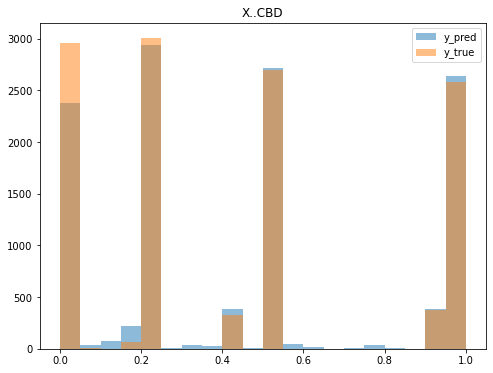

<Figure size 432x288 with 0 Axes>

In [97]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_cbd.png')

Pearson R

In [102]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")


Pearson correlation coefficient: 0.939
P-value: 0.000


<AxesSubplot:>

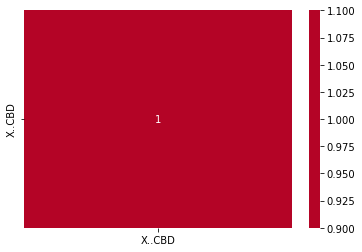

In [103]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)